<a href="https://colab.research.google.com/github/PrabaKDataScience/DS_Projects/blob/main/03_customer_churn/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn or Customer attrition



1.   **Contractual Churn**  - when customers decide not to continue with their expired contarcts (SAAS service providers )
2.   **Voluntary Churn** - When customers decide to cancel existing service (prepaid mobile cancel)
3.   **Non contractual Churn** - When customers leave a possible purchase without completing the transaction



> Reason for customer churn



1.   Lack of usage of the product
2.   Poor service 
3. Better price at somewhere else


The reason can vary based on the industry type . The mentioned points are common for all



> Stakeholders of company is investing more time and effort to predict the customer churn

> It is not so easy task to get a new customer than retaining a existing one.

Concept Credit : https://towardsdatascience.com/customer-churn-analysis-4f77cc70b3bd

Data Credit : https://raw.githubusercontent.com/anilak1978/

Our data set is from a credit card company, where we are able review customer attributes such as gender, age, tenure, balance, number of products they are subscribed to, their estimated salary and if they stopped the subscription or not.

# Load the Data

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/anilak1978/customer_churn/master/Churn_Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA (Exploratory Data Analysis)

> We have to find the important independent variables (main features) from the available independent variables (features)

In [24]:
df.shape

(10000, 14)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:

# Looking for missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



> 💥💥We have to ask questions  from the solution we are expecting.

1.  Does customers exit when the salary is low?
2.  Does customers exit when the credit score is low?
3. Does customers exit after certain age?

Like this we have to ask questions linking features and labels

♦ Is there any relationship between the features itself? (To avoid multi colinearity)

Text(32.354453125000006, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

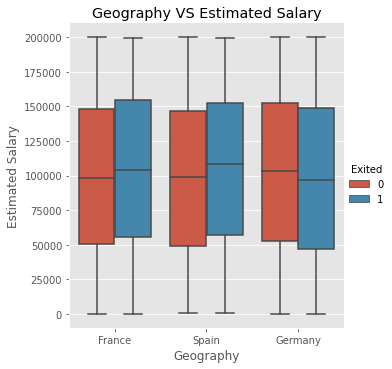

In [28]:
# Looking at Geography and Gender Distribution against Estimated Salary
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Exited", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

Out of those who have exited , In germany we can find the avergae estimated salary is low where as in other countries it is not so .

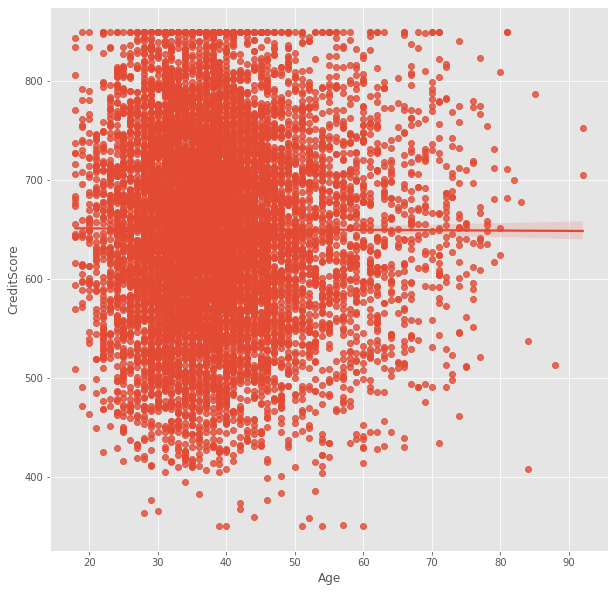

In [29]:
# Looking at linear relationship between Age and CreditScore
plt.figure(figsize=(10,10))
sns.regplot(x="Age", y="CreditScore", data=df)

We dont see the linear relationship with Credit score and age . 

In [30]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


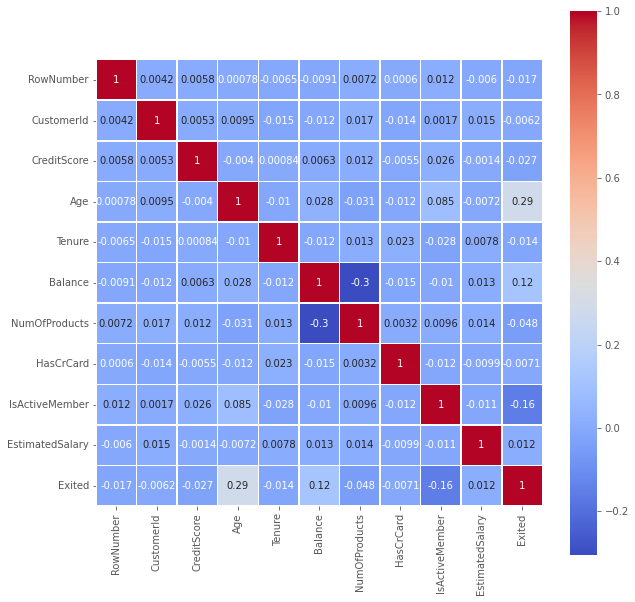

In [31]:
# Looking for the relationship between Numerical variables
import seaborn as sns
from matplotlib import pyplot as plt

corr = df.corr()

plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
g = sns.heatmap(corr, cmap='coolwarm', square=True, linecolor='w', linewidth=.5,annot=True)
plt.show()

> We observe that 
1. Age is 0.29 in correlation with Exited 
2. Balance is having the next highest correlation
3. Balance and Numof Products is negatively corelated

# Preprocess

In [35]:
# We can take out RowNumber , CustomerId , Surname since all these are just identifier 
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoder

In [40]:
from sklearn.preprocessing import LabelEncoder

geo_le = LabelEncoder()
encoded_geo = geo_le.fit_transform(df['Geography'])
geo_le.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [41]:
encoded_geo[:5]

array([0, 2, 0, 0, 2])

In [42]:
df['Geography_encoded'] = encoded_geo

In [49]:
df.drop(['Geography'],axis='columns',inplace=True)

In [47]:
df['Gender'].value_counts()

array(['Female', 'Male'], dtype=object)

In [51]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [52]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,2
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,2


In [38]:
# There is strong imbalance of the traget label in the dataset 
# We will handle this later
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [58]:
2037/7963

0.25580811252040686

# Data Split - No Scaling

In [53]:
features = df.drop(['Exited'],axis=1)
labels = df['Exited']

In [57]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test,y_train,y_test = tts(features,labels,test_size=0.2,random_state=43,stratify=labels)


>We are trying to have the same propotion of label in the training data like in the input

In [59]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [60]:
1630/6370

0.25588697017268447

In [61]:
X_train.shape

(8000, 10)

## Model Building

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
model_1 = Pipeline(
    [
        ('Classifier',  DecisionTreeClassifier())
    ]
    
)

model_1.fit(X_train.values,y_train.values)

Pipeline(steps=[('Classifier', DecisionTreeClassifier())])

## Evaluating the model

In [64]:
y_pred = model_1.predict(X_test.values)

In [65]:
from sklearn.metrics import classification_report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1593
           1       0.52      0.54      0.53       407

    accuracy                           0.81      2000
   macro avg       0.70      0.71      0.70      2000
weighted avg       0.81      0.81      0.81      2000



>> Observation : model is moreover guessing 52% . Not a good measure😌